In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import pickle

import warnings
warnings.filterwarnings('ignore')

In [67]:
df =pd.read_csv(r'https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv')
df.head(15)

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
0   CS-97001     B-     D+     C-         C     C-     D+      D     C-   
1   CS-97002      A      D     D+         D     B-      C      D      A   
2   CS-97003      A      B      A        B-     B+      A     B-     B+   
3   CS-97004      D     C+     D+         D      D     A-     D+     C-   
4   CS-97005     A-     A-     A-        B+      A      A     A-     B+   
5   CS-97006      A     B-      B        D+     C+     A-     C+      B   
6   CS-97007     B-     C-     A-         D     A-      B      A     B+   
7   CS-97008     B+     B+     C+         C      C     A-     C-     A-   
8   CS-97009     A-      C     A-        D+      B     A-     A-     A-   
9   CS-97010      A      B     C+         B      B     A-      C     B-   
10  CS-97011     A-     B-     B+        C-     C-     B-     C+     B-   
11  CS-97012     A-      C     A-        C+     C-      A     B-     B+   
12  CS-97013      B      C     A-         C     B-      B     D+      C   
13  CS-97014      A     C-     A-        C-      B     A-     C+     A-   
14  CS-97015      A      C     A-        C+     A-      A     B-     A-   

   EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412  \
0      B-  ...     C-     C-     C-     C-     A-      A     C-      B     A-   
1      D+  ...     D+      D      C      D     A-     B-      C      C      B   
2      A-  ...      B      B      A      C      A      A      A     A-      A   
3       D  ...     D+      C     D+     C-     B-      B     C+     C+     C+   
4       A  ...     B-     B+     B+     B-     A-      A     A-     A-      A   
5      B+  ...      C     B-     C+     C+     A-     A-     B+     B-      B   
6      A-  ...     B-      C     B+     B-      A     A-     B+     B+      A   
7       B  ...     D+     B+     B+      C      A     B+     A-     A-     A-   
8      B+  ...     B+      B     B-     C+      A     A-     B+     A-      A   
9      A-  ...     C+     B-     B+     B-      A      A     A-      B      A   
10      A  ...      C     B-     C-     C-      B     B+     B-     C-     B+   
11     A-  ...     A-     B-     B+      C      A     A-     B-     C+     A-   
12     B+  ...     C-      C     C-      C      A     A-     B-     A-     B+   
13     A-  ...      B     A-     A-     B+     A-      A      A     A-      A   
14     A-  ...     C+     A-     A-     B+     A-     A+      A      A      A   

     CGPA  
0   2.205  
1   2.008  
2   3.608  
3   1.906  
4   3.448  
5   3.026  
6   2.957  
7   3.043  
8   3.358  
9   3.247  
10  2.681  
11  3.281  
12  2.792  
13  3.523  
14  3.443  

[15 rows x 43 columns]

In [68]:
# Checking duplicate records
df[df.duplicated()]

Empty DataFrame
Columns: [Seat No., PH-121, HS-101, CY-105, HS-105/12, MT-111, CS-105, CS-106, EL-102, EE-119, ME-107, CS-107, HS-205/20, MT-222, EE-222, MT-224, CS-210, CS-211, CS-203, CS-214, EE-217, CS-212, CS-215, MT-331, EF-303, HS-304, CS-301, CS-302, TC-383, MT-442, EL-332, CS-318, CS-306, CS-312, CS-317, CS-403, CS-421, CS-406, CS-414, CS-419, CS-423, CS-412, CGPA]
Index: []

[0 rows x 43 columns]

In [69]:
# Dropping Seat No
df =df.drop(columns =['Seat No.'])
df

PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119 ME-107  \
0       B-     D+     C-         C     C-     D+      D     C-     B-     C-   
1        A      D     D+         D     B-      C      D      A     D+      D   
2        A      B      A        B-     B+      A     B-     B+     A-     A-   
3        D     C+     D+         D      D     A-     D+     C-      D     C+   
4       A-     A-     A-        B+      A      A     A-     B+      A     A-   
..     ...    ...    ...       ...    ...    ...    ...    ...    ...    ...   
566      B      A      A        A-     A+      A     A-     A-     A+     B+   
567     A+      A      A         A      A      A      A     A-      A      A   
568      B      A     A-        B+      A      A      A      A      A      B   
569      A     B+      D         A      D     D+     B-     C-     B-     C-   
570      C      D      D         C      C     D+      B     C+      C     D+   

     ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0    ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1    ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2    ...      B      B      A      C      A      A      A     A-      A  3.608  
3    ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4    ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  
..   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
566  ...     A-     A-      A      A      A     B+     B+      B      A  3.798  
567  ...     B+     B+      A      A     A-      B     A-      C     A-  3.772  
568  ...     A-      B      A     B+      A      C     B+     A-     A-  3.470  
569  ...      D      B      B     C-      D      C      B     B-      C  2.193  
570  ...     C+      C     B-      D      F     C-     B+      D     C-  1.753  

[571 rows x 42 columns]

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    object 
 1   HS-101     571 non-null    object 
 2   CY-105     570 non-null    object 
 3   HS-105/12  570 non-null    object 
 4   MT-111     569 non-null    object 
 5   CS-105     571 non-null    object 
 6   CS-106     569 non-null    object 
 7   EL-102     569 non-null    object 
 8   EE-119     569 non-null    object 
 9   ME-107     569 non-null    object 
 10  CS-107     569 non-null    object 
 11  HS-205/20  566 non-null    object 
 12  MT-222     566 non-null    object 
 13  EE-222     564 non-null    object 
 14  MT-224     564 non-null    object 
 15  CS-210     564 non-null    object 
 16  CS-211     566 non-null    object 
 17  CS-203     566 non-null    object 
 18  CS-214     565 non-null    object 
 19  EE-217     565 non-null    object 
 20  CS-212    

__Many columns have null values, We will delete the rows having null values. As fill null with mode or any other value may effect score accuracy__

In [71]:
df =df.dropna()

In [72]:
# Dataset after removing null values
df

PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119 ME-107  \
0       B-     D+     C-         C     C-     D+      D     C-     B-     C-   
1        A      D     D+         D     B-      C      D      A     D+      D   
2        A      B      A        B-     B+      A     B-     B+     A-     A-   
3        D     C+     D+         D      D     A-     D+     C-      D     C+   
4       A-     A-     A-        B+      A      A     A-     B+      A     A-   
..     ...    ...    ...       ...    ...    ...    ...    ...    ...    ...   
566      B      A      A        A-     A+      A     A-     A-     A+     B+   
567     A+      A      A         A      A      A      A     A-      A      A   
568      B      A     A-        B+      A      A      A      A      A      B   
569      A     B+      D         A      D     D+     B-     C-     B-     C-   
570      C      D      D         C      C     D+      B     C+      C     D+   

     ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0    ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1    ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2    ...      B      B      A      C      A      A      A     A-      A  3.608  
3    ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4    ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  
..   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
566  ...     A-     A-      A      A      A     B+     B+      B      A  3.798  
567  ...     B+     B+      A      A     A-      B     A-      C     A-  3.772  
568  ...     A-      B      A     B+      A      C     B+     A-     A-  3.470  
569  ...      D      B      B     C-      D      C      B     B-      C  2.193  
570  ...     C+      C     B-      D      F     C-     B+      D     C-  1.753  

[417 rows x 42 columns]

In [73]:
# Again checking null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 570
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     417 non-null    object 
 1   HS-101     417 non-null    object 
 2   CY-105     417 non-null    object 
 3   HS-105/12  417 non-null    object 
 4   MT-111     417 non-null    object 
 5   CS-105     417 non-null    object 
 6   CS-106     417 non-null    object 
 7   EL-102     417 non-null    object 
 8   EE-119     417 non-null    object 
 9   ME-107     417 non-null    object 
 10  CS-107     417 non-null    object 
 11  HS-205/20  417 non-null    object 
 12  MT-222     417 non-null    object 
 13  EE-222     417 non-null    object 
 14  MT-224     417 non-null    object 
 15  CS-210     417 non-null    object 
 16  CS-211     417 non-null    object 
 17  CS-203     417 non-null    object 
 18  CS-214     417 non-null    object 
 19  EE-217     417 non-null    object 
 20  CS-212     417 

In [74]:
# Check count of each column
for i in df:
    print(df[i].value_counts())

PH-121
A     105
A-    103
B+     50
B-     43
B      36
A+     22
C      17
C+     14
C-     11
D+      9
D       7
Name: count, dtype: int64
HS-101
A-    64
B-    62
B     47
C     46
C-    40
B+    40
C+    36
D     30
A     26
D+    23
A+     3
Name: count, dtype: int64
CY-105
A     152
A-    108
B+     39
B-     26
B      25
A+     16
C      13
C-     11
C+     10
D+      9
D       8
Name: count, dtype: int64
HS-105/12
A     81
A-    62
B+    42
B     37
A+    33
B-    32
D     28
D+    27
C     26
C+    26
C-    23
Name: count, dtype: int64
MT-111
A-    82
A     59
B-    56
B     45
B+    44
C-    29
C+    25
D     23
C     20
D+    18
A+    16
Name: count, dtype: int64
CS-105
A     135
A-    120
B+     45
A+     41
B      25
B-     16
C+     12
C       7
D+      6
C-      6
D       4
Name: count, dtype: int64
CS-106
A-    79
B     58
A     52
B+    52
B-    43
C+    37
D+    29
C-    26
D     21
C     16
A+     4
Name: count, dtype: int64
EL-102
A-    91
A     60
B+    50
B     

In [75]:
#Checking unique counts
df.nunique()

PH-121        11
HS-101        11
CY-105        11
HS-105/12     11
MT-111        11
CS-105        11
CS-106        11
EL-102        11
EE-119        11
ME-107        11
CS-107        11
HS-205/20     11
MT-222        11
EE-222        12
MT-224        12
CS-210        12
CS-211        11
CS-203        11
CS-214        11
EE-217        11
CS-212        11
CS-215        11
MT-331        11
EF-303        12
HS-304        12
CS-301        11
CS-302        11
TC-383        11
MT-442        11
EL-332        13
CS-318        13
CS-306        12
CS-312        12
CS-317        12
CS-403        11
CS-421        13
CS-406        13
CS-414        12
CS-419        12
CS-423        12
CS-412        13
CGPA         370
dtype: int64

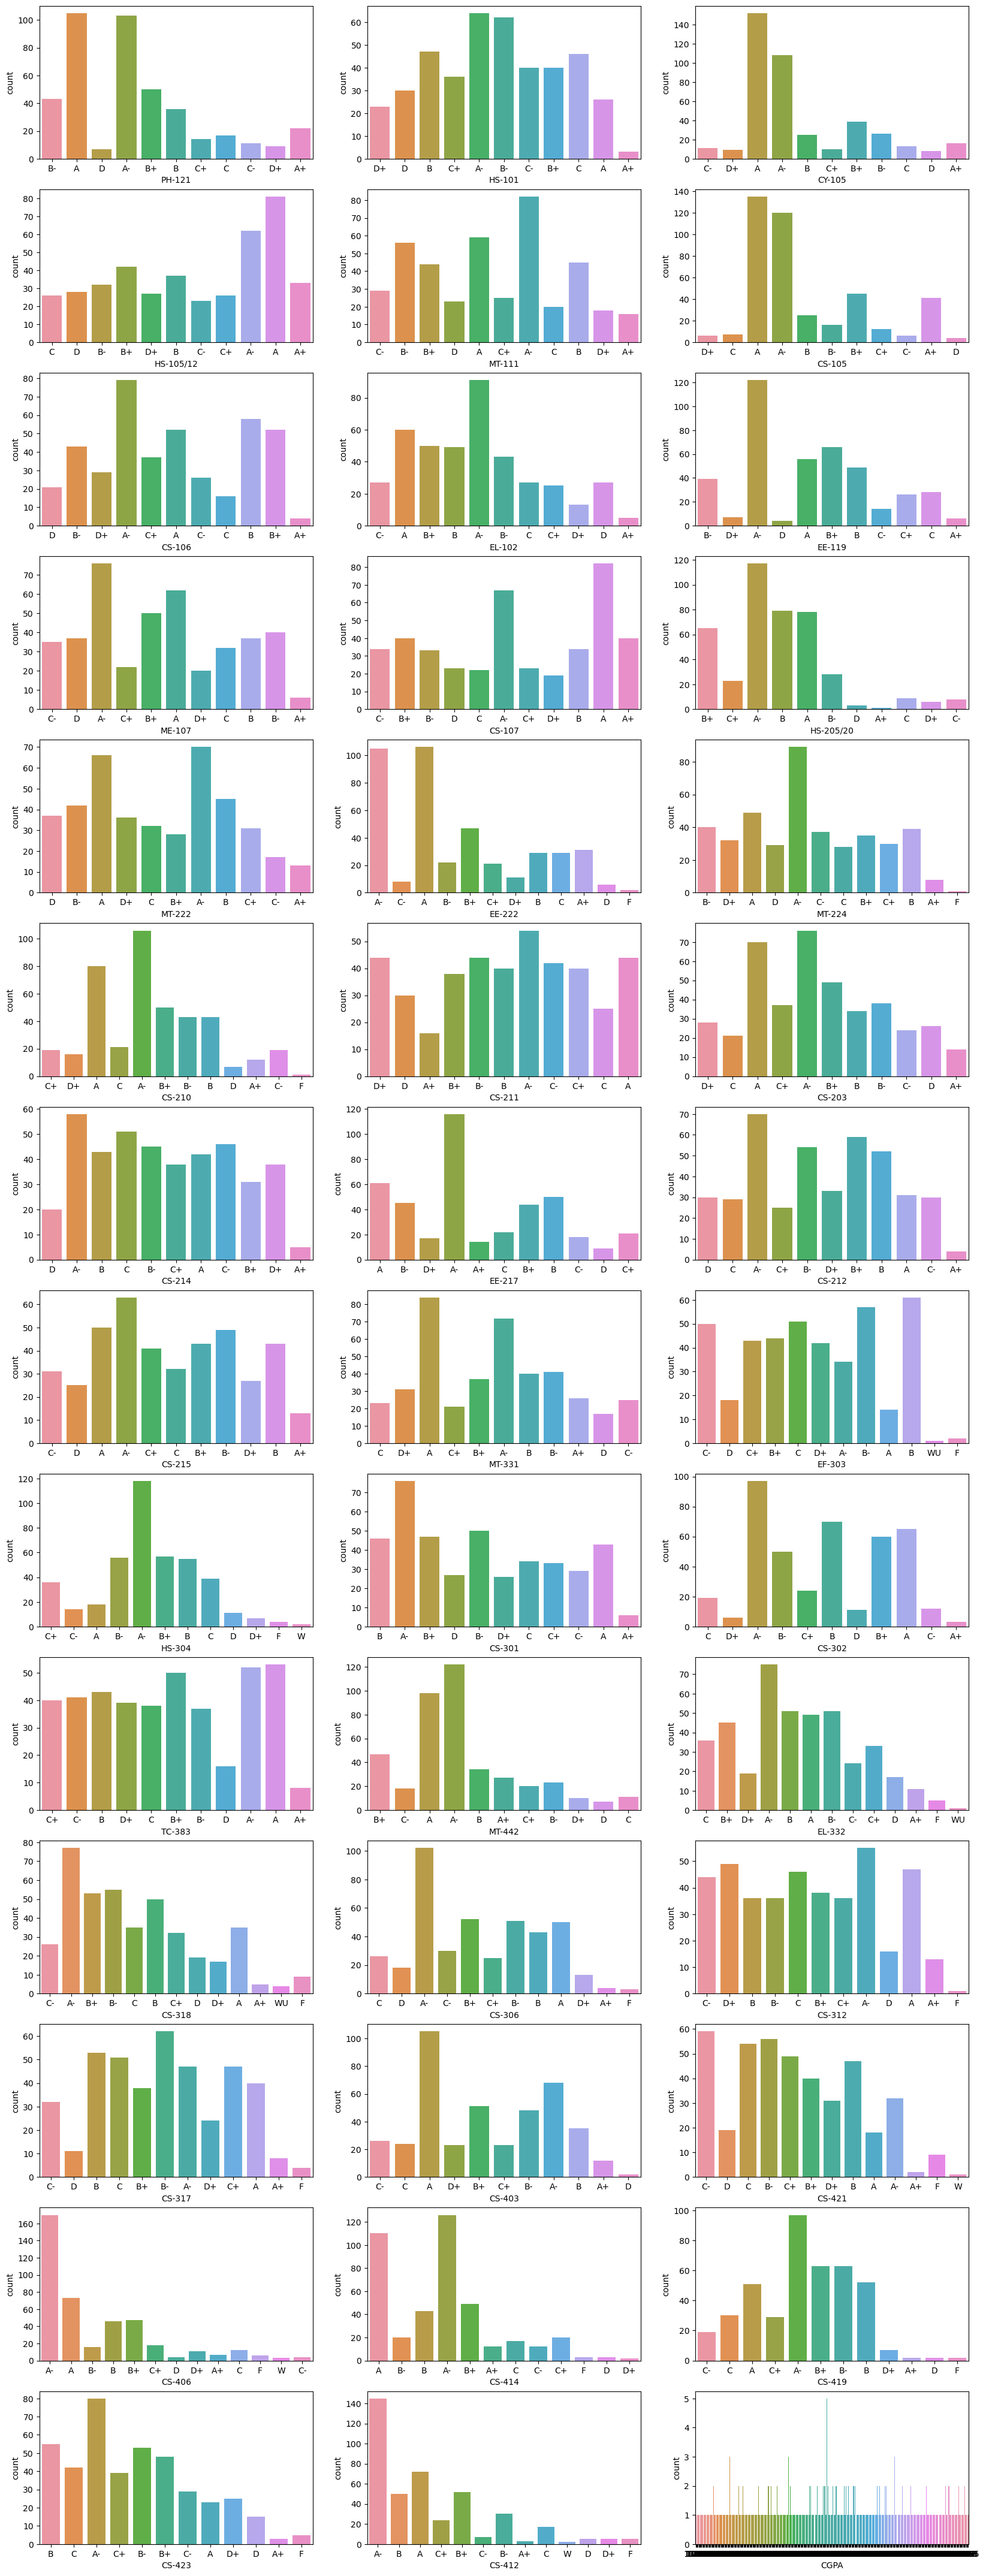

In [76]:
# Visualizing the count of each column
plt.figure(figsize =(20,55))
plotnumber =1

for i in df:
    if plotnumber <=42:
        plt.subplot(14, 3, plotnumber)
        sns.countplot(x =i, data =df)
        plt.xlabel(i)
    plotnumber+=1
plt.show()

In [77]:
# Encoding categorical columns
from sklearn.preprocessing import OrdinalEncoder
OE =OrdinalEncoder()
for i in df:
    if df[i].dtypes=='object':
        df[i] =OE.fit_transform(df[i].values.reshape(-1, 1))
    
df

PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  \
0       5.0    10.0     8.0        6.0     8.0    10.0     9.0     8.0   
1       0.0     9.0    10.0        9.0     5.0     6.0     9.0     0.0   
2       0.0     3.0     0.0        5.0     4.0     0.0     5.0     4.0   
3       9.0     7.0    10.0        9.0     9.0     2.0    10.0     8.0   
4       2.0     2.0     2.0        4.0     0.0     0.0     2.0     4.0   
..      ...     ...     ...        ...     ...     ...     ...     ...   
566     3.0     0.0     0.0        2.0     1.0     0.0     2.0     2.0   
567     1.0     0.0     0.0        0.0     0.0     0.0     0.0     2.0   
568     3.0     0.0     2.0        4.0     0.0     0.0     0.0     0.0   
569     0.0     4.0     9.0        0.0     9.0    10.0     5.0     8.0   
570     6.0     9.0     9.0        6.0     6.0    10.0     3.0     7.0   

     EE-119  ME-107  ...  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  \
0       5.0     8.0  ...     8.0     8.0     8.0     8.0     2.0     0.0   
1      10.0     9.0  ...    10.0     9.0     6.0     9.0     2.0     5.0   
2       2.0     2.0  ...     3.0     3.0     0.0     6.0     0.0     0.0   
3       9.0     7.0  ...    10.0     6.0    10.0     8.0     5.0     3.0   
4       0.0     2.0  ...     5.0     4.0     4.0     5.0     2.0     0.0   
..      ...     ...  ...     ...     ...     ...     ...     ...     ...   
566     1.0     4.0  ...     2.0     2.0     0.0     0.0     0.0     4.0   
567     0.0     0.0  ...     4.0     4.0     0.0     0.0     2.0     3.0   
568     0.0     3.0  ...     2.0     3.0     0.0     4.0     0.0     6.0   
569     5.0     8.0  ...     9.0     3.0     3.0     8.0     9.0     6.0   
570     6.0    10.0  ...     7.0     6.0     5.0     9.0    11.0     8.0   

     CS-419  CS-423  CS-412   CGPA  
0       8.0     3.0     2.0  2.205  
1       6.0     6.0     3.0  2.008  
2       0.0     2.0     0.0  3.608  
3       7.0     7.0     7.0  1.906  
4       2.0     2.0     0.0  3.448  
..      ...     ...     ...    ...  
566     4.0     3.0     0.0  3.798  
567     2.0     6.0     2.0  3.772  
568     4.0     2.0     2.0  3.470  
569     3.0     5.0     6.0  2.193  
570     4.0     9.0     8.0  1.753  

[417 rows x 42 columns]

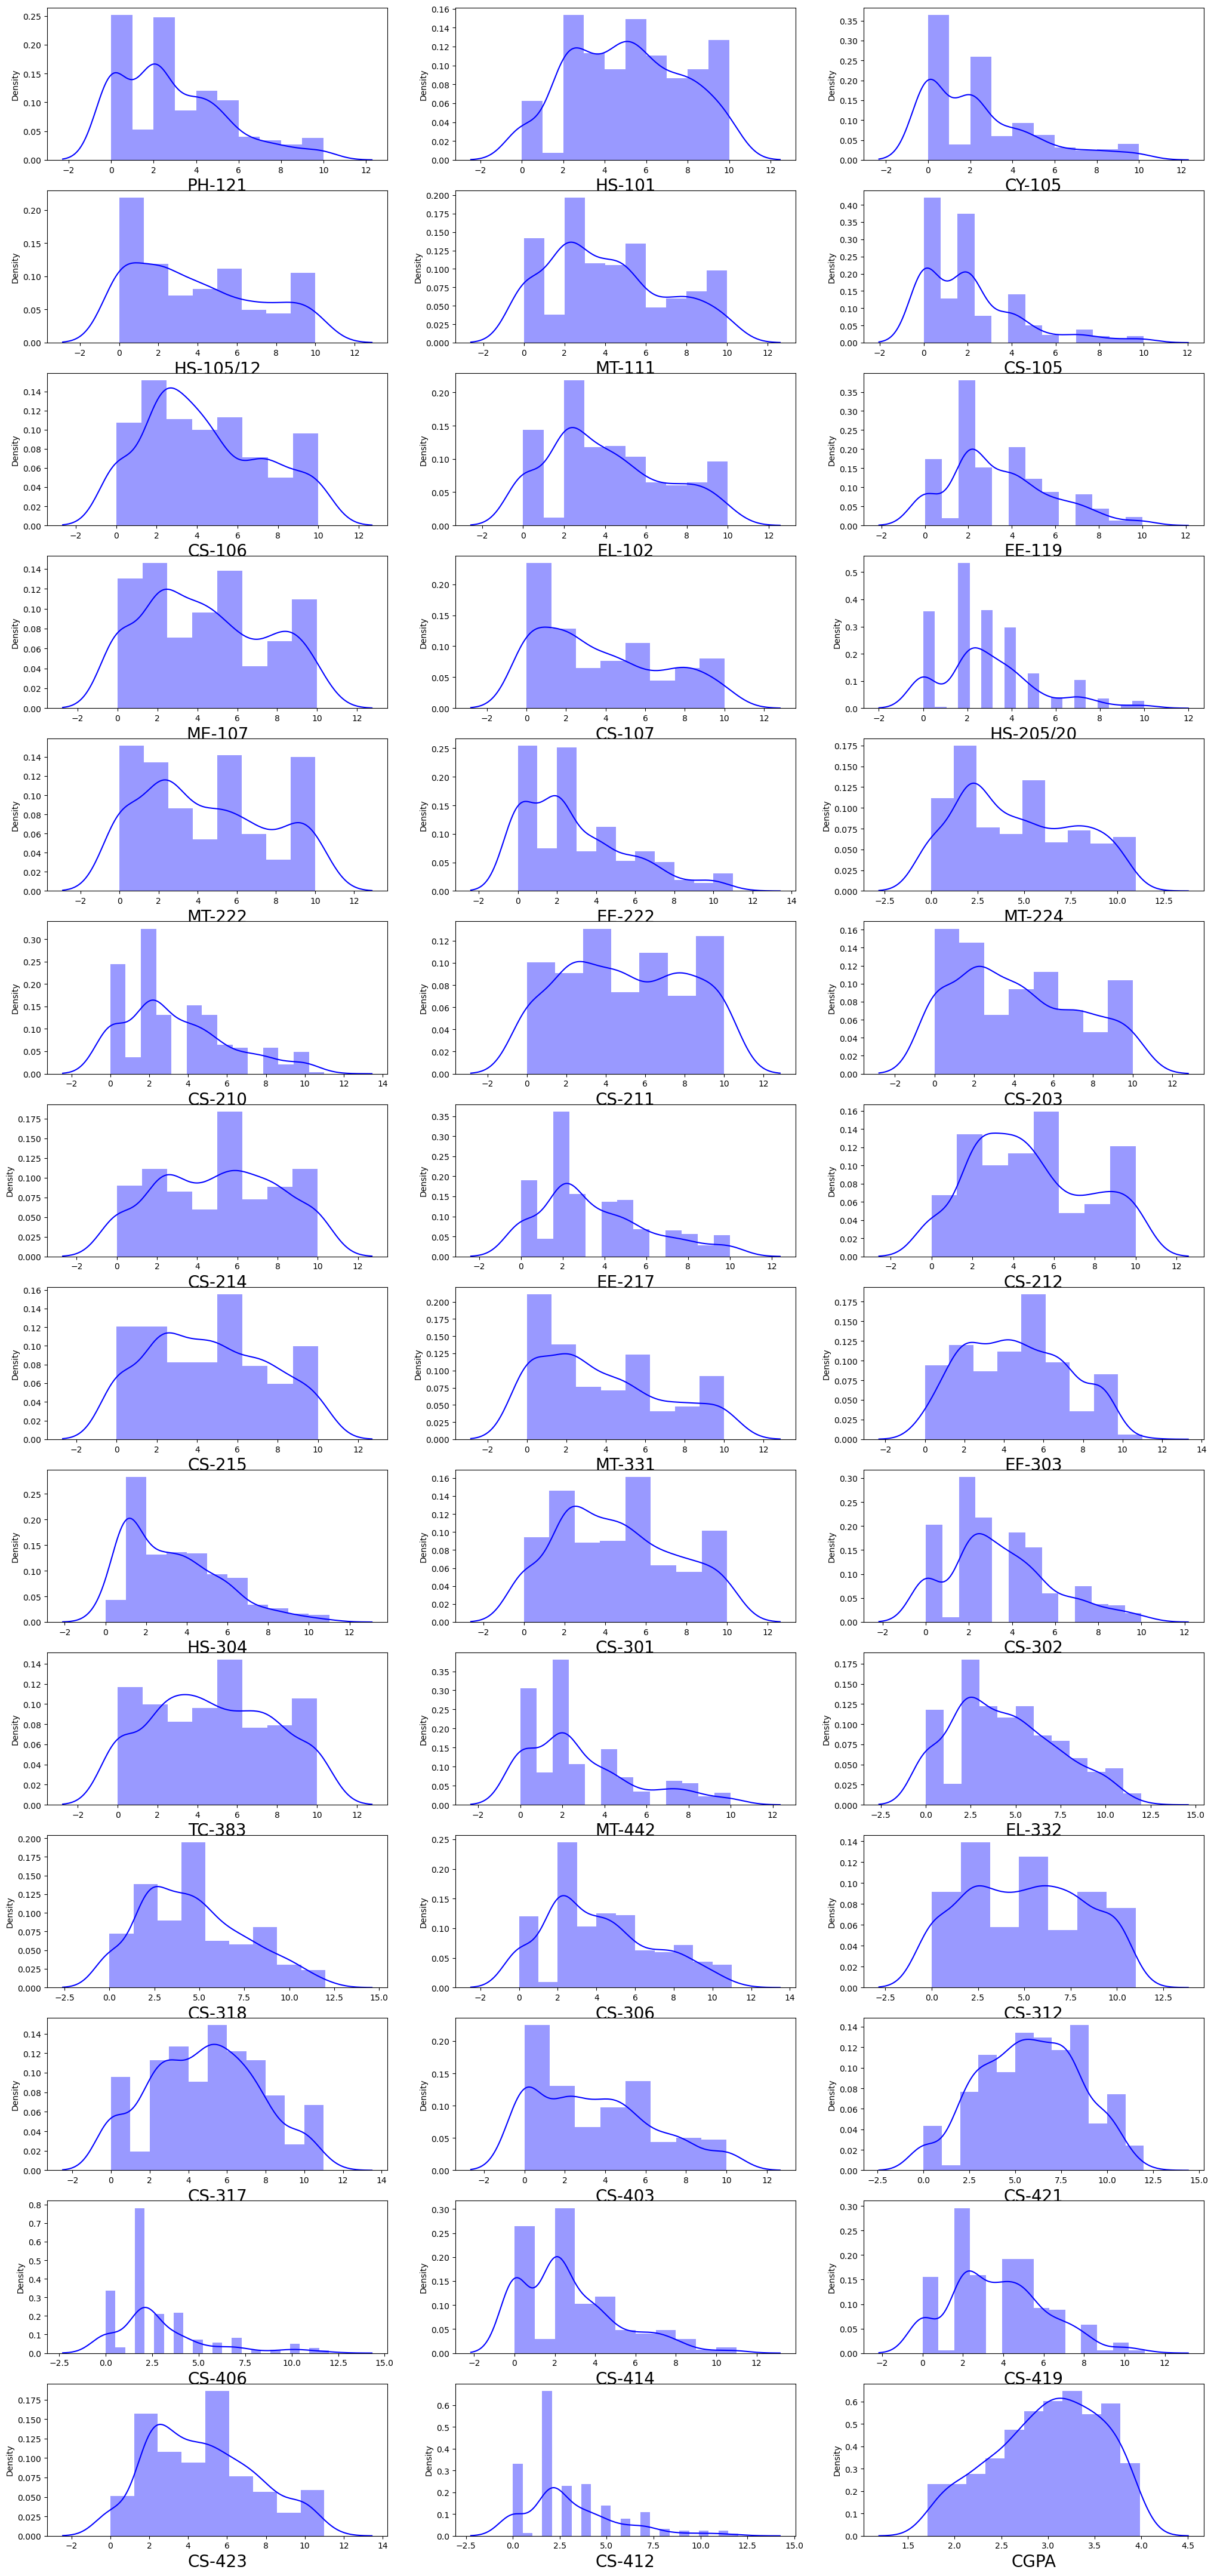

In [78]:
# Vislualizing distribution of data
plt.figure(figsize =(25,55))
plotnumber =1

for i in df:
    if plotnumber <= 42:
        plt.subplot(14, 3, plotnumber)
        sns.distplot(df[i], color ='b')
        plt.xlabel(i, fontsize =20)
        
    plotnumber+=1
plt.show()

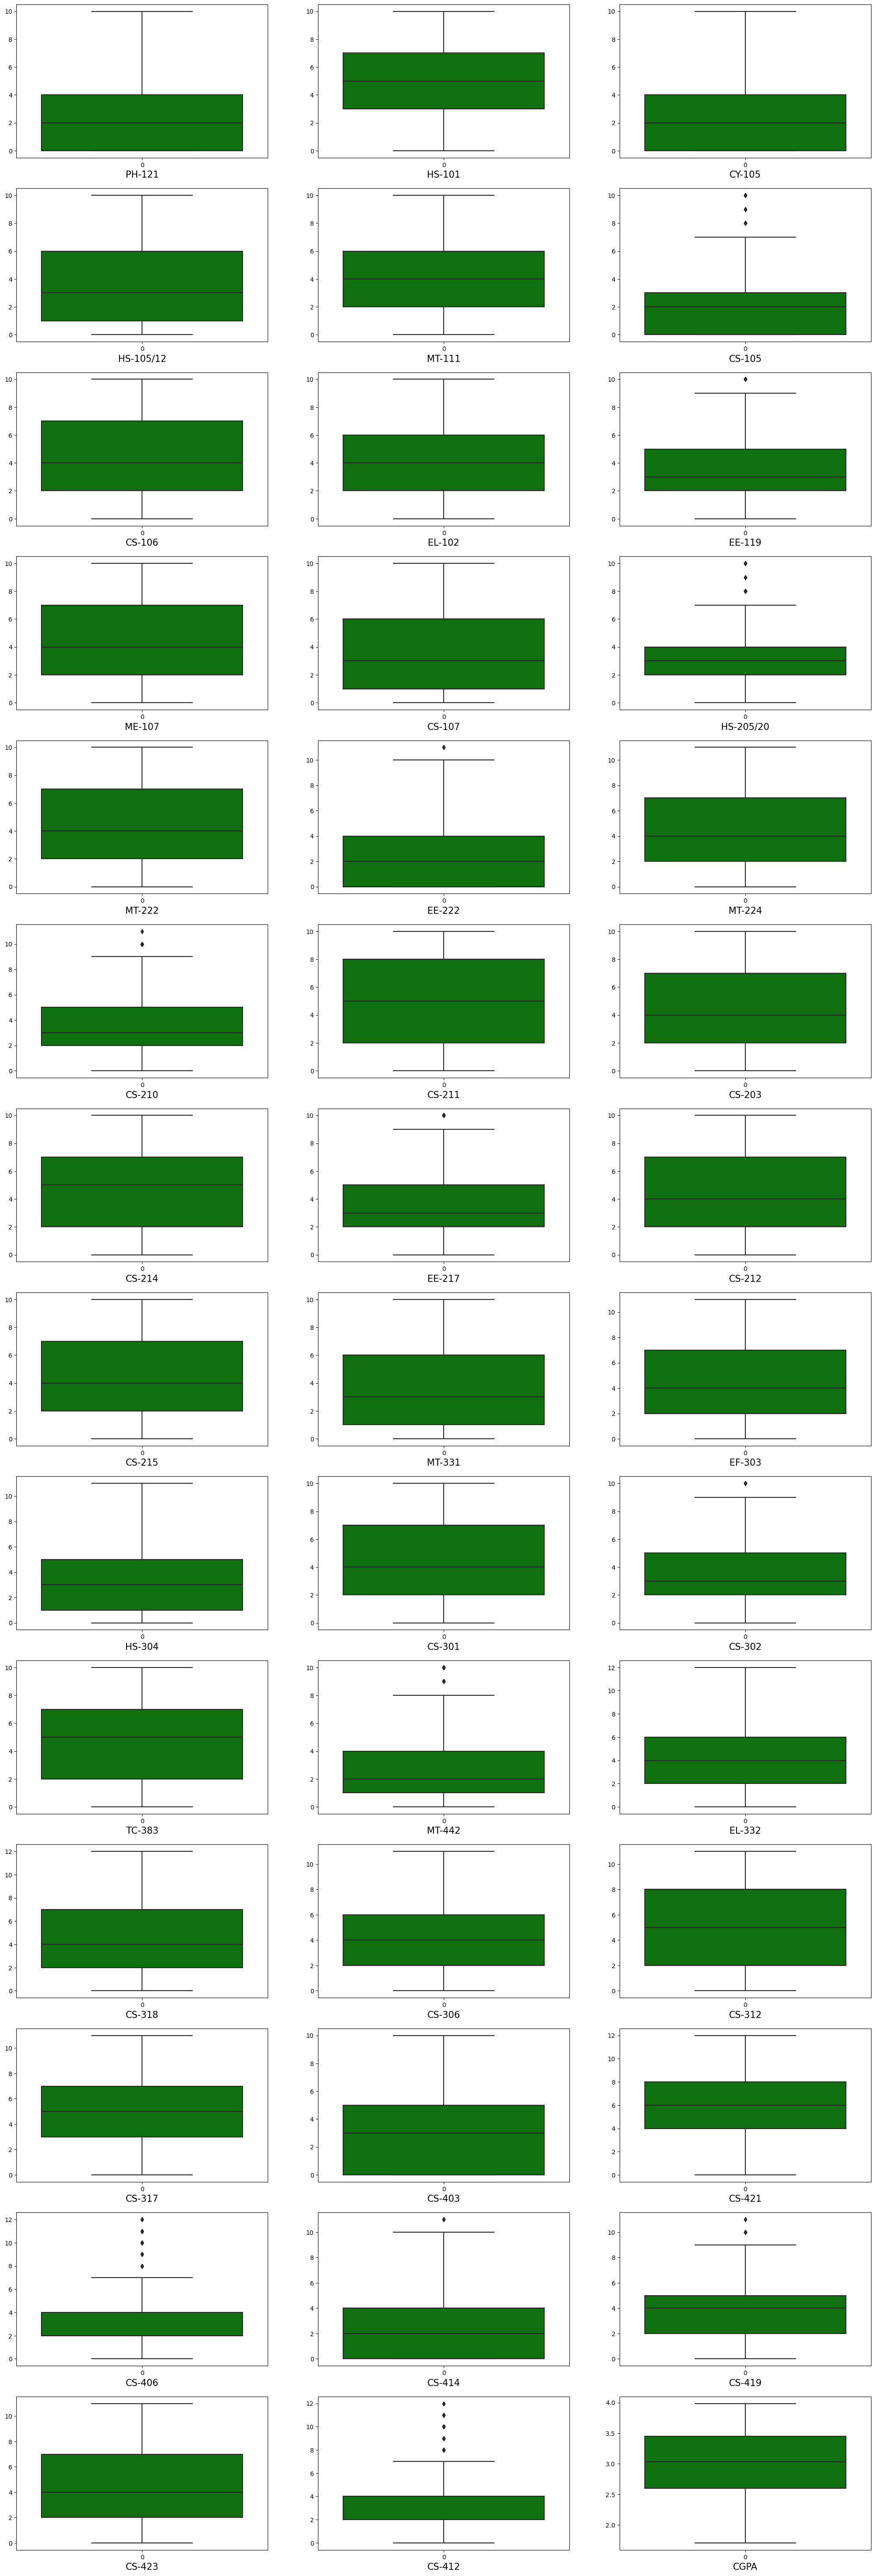

In [79]:
# Checking outliers
plt.figure(figsize =(25,75))
plotnumber =1

for i in df:
    if plotnumber <=42:
        plt.subplot(14,3, plotnumber)
        sns.boxplot(df[i], color ='g')
        plt.xlabel(i, fontsize =15)
    plotnumber+=1
plt.show()

In [80]:
df_iqr =df[['CS-105', 'EE-119', 'HS-205/20', 'EE-222', 'CS-210', 'EE-217', 'CS-302', 'MT-442', 'CS-406', 'CS-414',
           'CS-419', 'CS-412']]
Q1= df_iqr.quantile(0.25)
Q3 =df_iqr.quantile(0.75)

IQR =Q3-Q1

#For Higher side
for i in df_iqr:
    high =Q3[i] + (1.5 * IQR[i])
    high_index =np.where(df_iqr[i] > high)
    df_iqr =df_iqr.drop(df_iqr.index[high_index])

# For Lower side
for i in df_iqr:
    low =Q1[i] - (1.5 *IQR[i])
    low_index =np.where(df_iqr[i] < low)
    df_iqr =df_iqr.drop(df_iqr.index[low_index])

In [81]:
# Removing outliers using zscore

df_zscore =df[['CS-105', 'EE-119', 'HS-205/20', 'EE-222', 'CS-210', 'EE-217', 'CS-302', 'MT-442', 'CS-406', 'CS-414',
           'CS-419', 'CS-412']]

z =np.abs(zscore(df_zscore))
df_zscore =df_zscore[(z < 3).all(axis =1)]
df_zscore.shape

(387, 12)

In [82]:
# Calculating data loss after using IQR and zscore

print("Shape of original dataset :", df.shape[0])
print('\nShape of dataset after using IQR method :', df_iqr.shape[0])
print("Data Loss after using IQR method :", ((df.shape[0] - df_iqr.shape[0])/df.shape[0])*100)
print('\nShape of dataset after using zscore :', df_zscore.shape[0])
print("Data Loss after using zscore method :", ((df.shape[0] - df_zscore.shape[0])/df.shape[0])*100)

Shape of original dataset : 417

Shape of dataset after using IQR method : 336
Data Loss after using IQR method : 19.424460431654676

Shape of dataset after using zscore : 387
Data Loss after using zscore method : 7.194244604316546


__We will use zscore for outlier removal as data loss is less as compared to IQR method__

In [83]:
z =np.abs(zscore(df))
df =df[(z < 3).all(axis =1)]
df.shape[0]

386

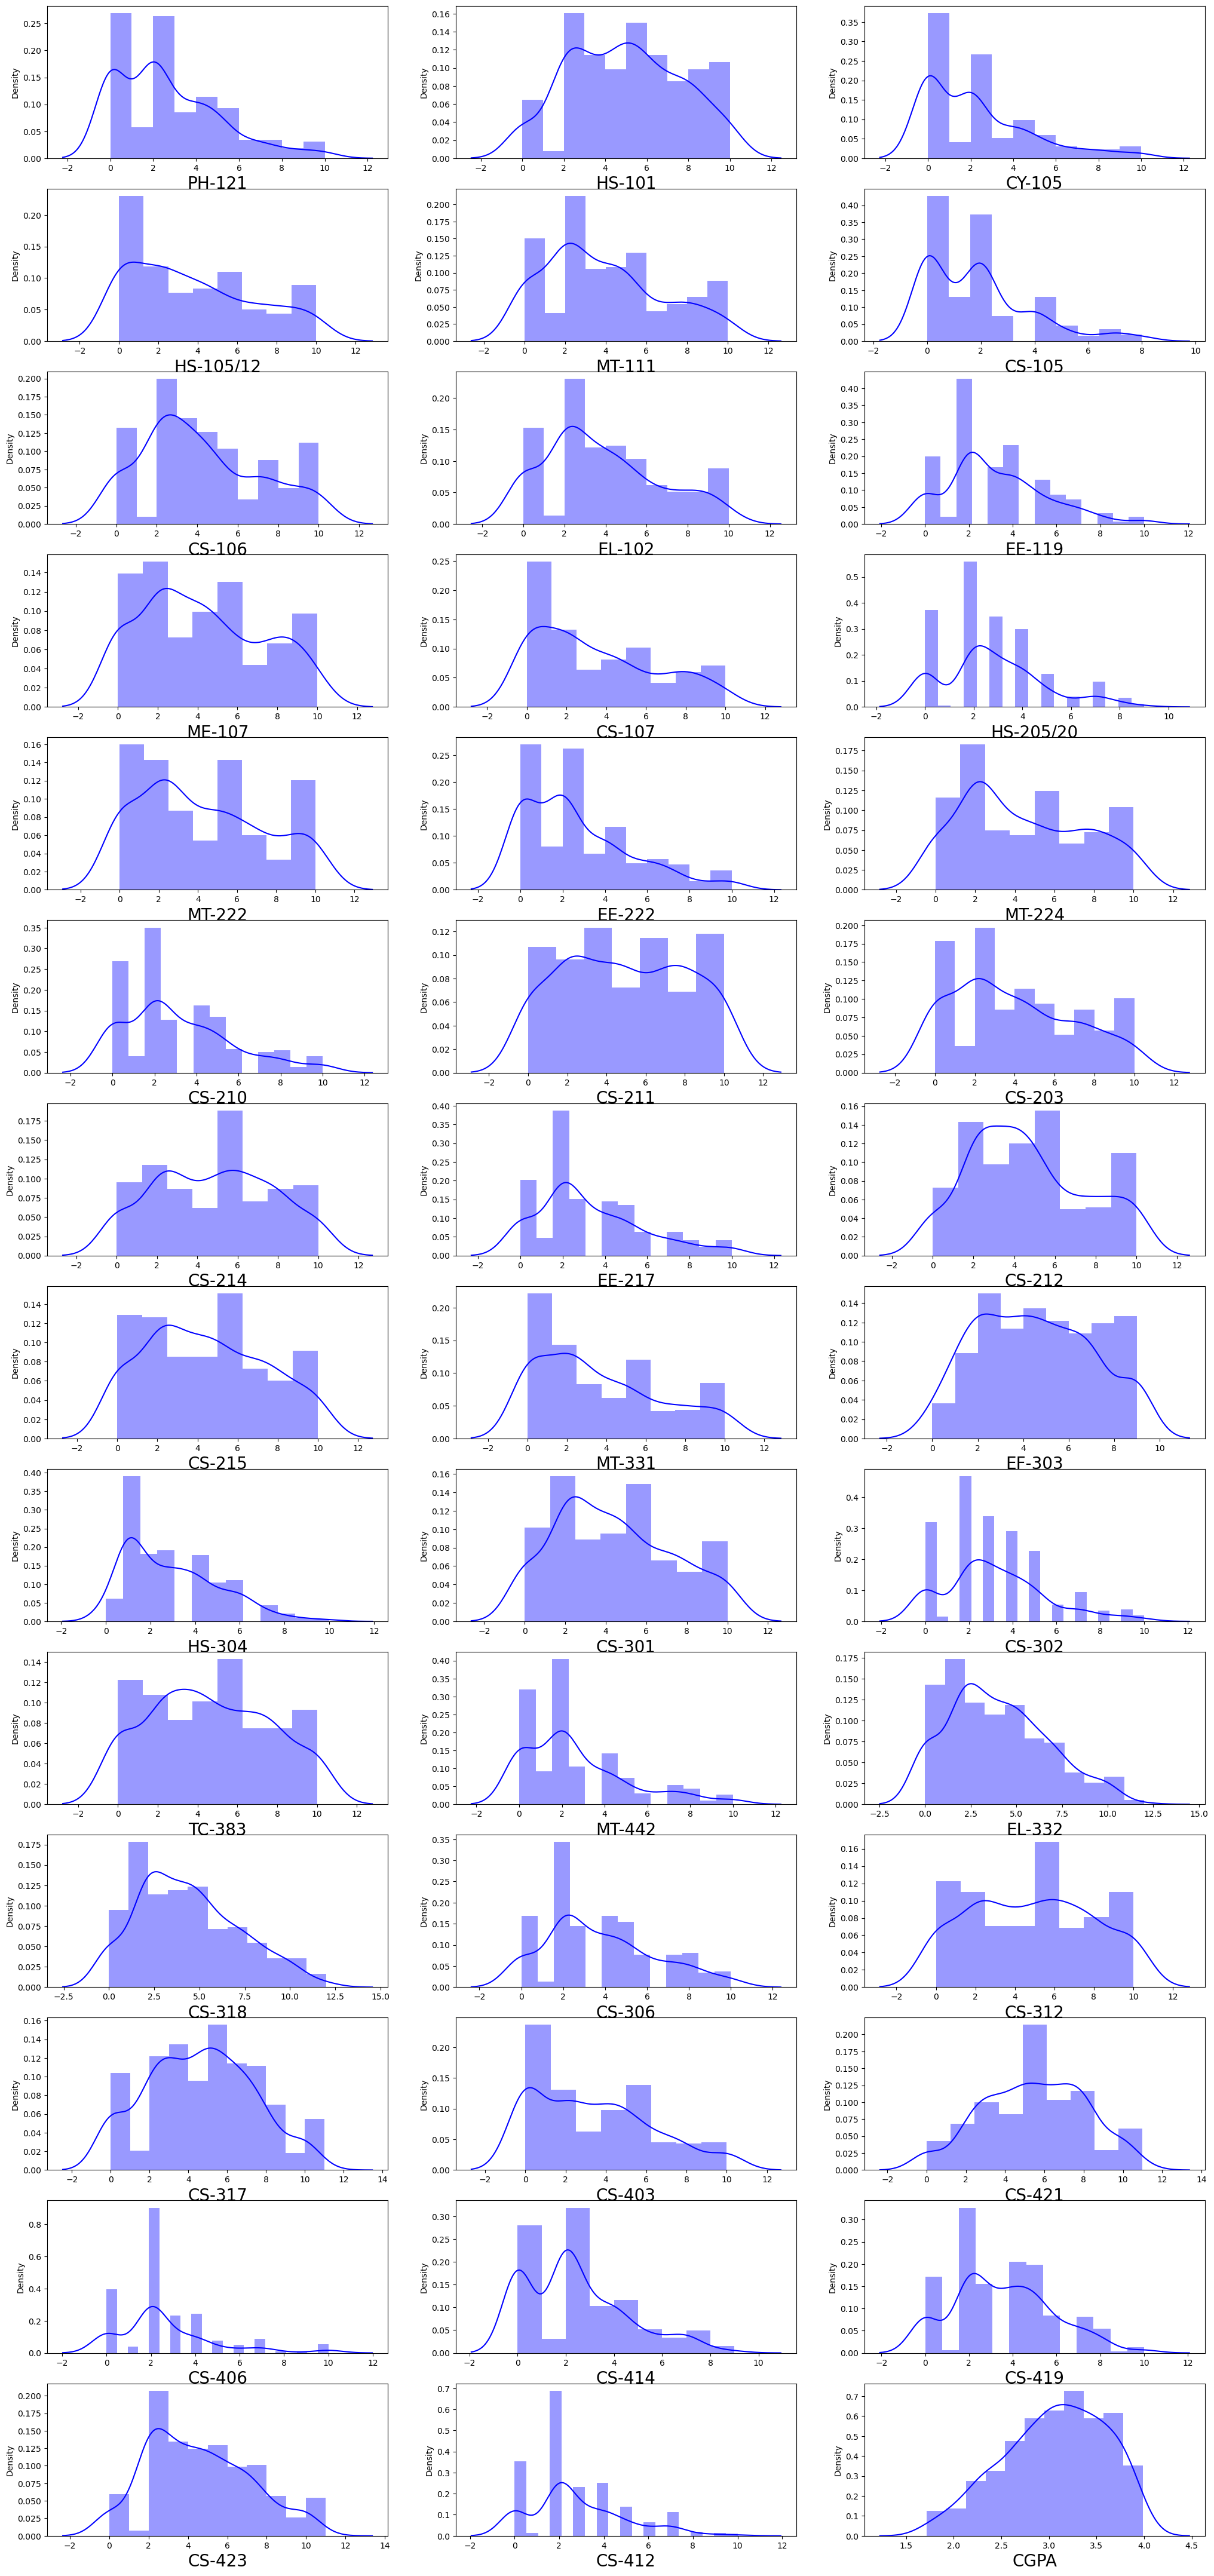

In [84]:
# Let's again visualize data distribution in dataset after removing outliers
plt.figure(figsize =(25,55))
plotnumber =1

for i in df:
    if plotnumber <= 42:
        plt.subplot(14, 3, plotnumber)
        sns.distplot(df[i], color ='b')
        plt.xlabel(i, fontsize =20)
        
    plotnumber+=1
plt.show()

In [85]:
# Checking skewness in dataset
df.skew()

PH-121       0.929998
HS-101       0.086636
CY-105       1.202231
HS-105/12    0.505569
MT-111       0.497873
CS-105       1.136273
CS-106       0.463656
EL-102       0.500157
EE-119       0.651485
ME-107       0.294291
CS-107       0.568712
HS-205/20    0.588188
MT-222       0.345418
EE-222       0.990665
MT-224       0.311215
CS-210       0.777693
CS-211       0.036073
CS-203       0.418378
CS-214       0.033061
EE-217       0.801573
CS-212       0.353550
CS-215       0.224103
MT-331       0.587516
EF-303       0.182212
HS-304       0.775859
CS-301       0.328028
CS-302       0.644134
TC-383       0.138975
MT-442       1.093127
EL-332       0.436284
CS-318       0.455456
CS-306       0.525044
CS-312       0.063795
CS-317       0.104237
CS-403       0.556392
CS-421      -0.105570
CS-406       1.345546
CS-414       0.790781
CS-419       0.341757
CS-423       0.374180
CS-412       0.760651
CGPA        -0.363811
dtype: float64

In [86]:
# Removing skewness in the dataset

df['CY-105'] =np.cbrt(df['CY-105'])
df['CS-105'] =np.cbrt(df['CS-105'])
df['EE-222'] =np.cbrt(df['EE-222'])
df['MT-442'] =np.cbrt(df['MT-442'])
df['CS-406'] =np.cbrt(df['CS-406'])
df['CS-414'] =np.cbrt(df['CS-414'])

In [87]:
# Againg checking skewness
df.skew()

PH-121       0.929998
HS-101       0.086636
CY-105      -0.219552
HS-105/12    0.505569
MT-111       0.497873
CS-105      -0.358009
CS-106       0.463656
EL-102       0.500157
EE-119       0.651485
ME-107       0.294291
CS-107       0.568712
HS-205/20    0.588188
MT-222       0.345418
EE-222      -0.570018
MT-224       0.311215
CS-210       0.777693
CS-211       0.036073
CS-203       0.418378
CS-214       0.033061
EE-217       0.801573
CS-212       0.353550
CS-215       0.224103
MT-331       0.587516
EF-303       0.182212
HS-304       0.775859
CS-301       0.328028
CS-302       0.644134
TC-383       0.138975
MT-442      -0.666273
EL-332       0.436284
CS-318       0.455456
CS-306       0.525044
CS-312       0.063795
CS-317       0.104237
CS-403       0.556392
CS-421      -0.105570
CS-406      -1.015106
CS-414      -0.662328
CS-419       0.341757
CS-423       0.374180
CS-412       0.760651
CGPA        -0.363811
dtype: float64

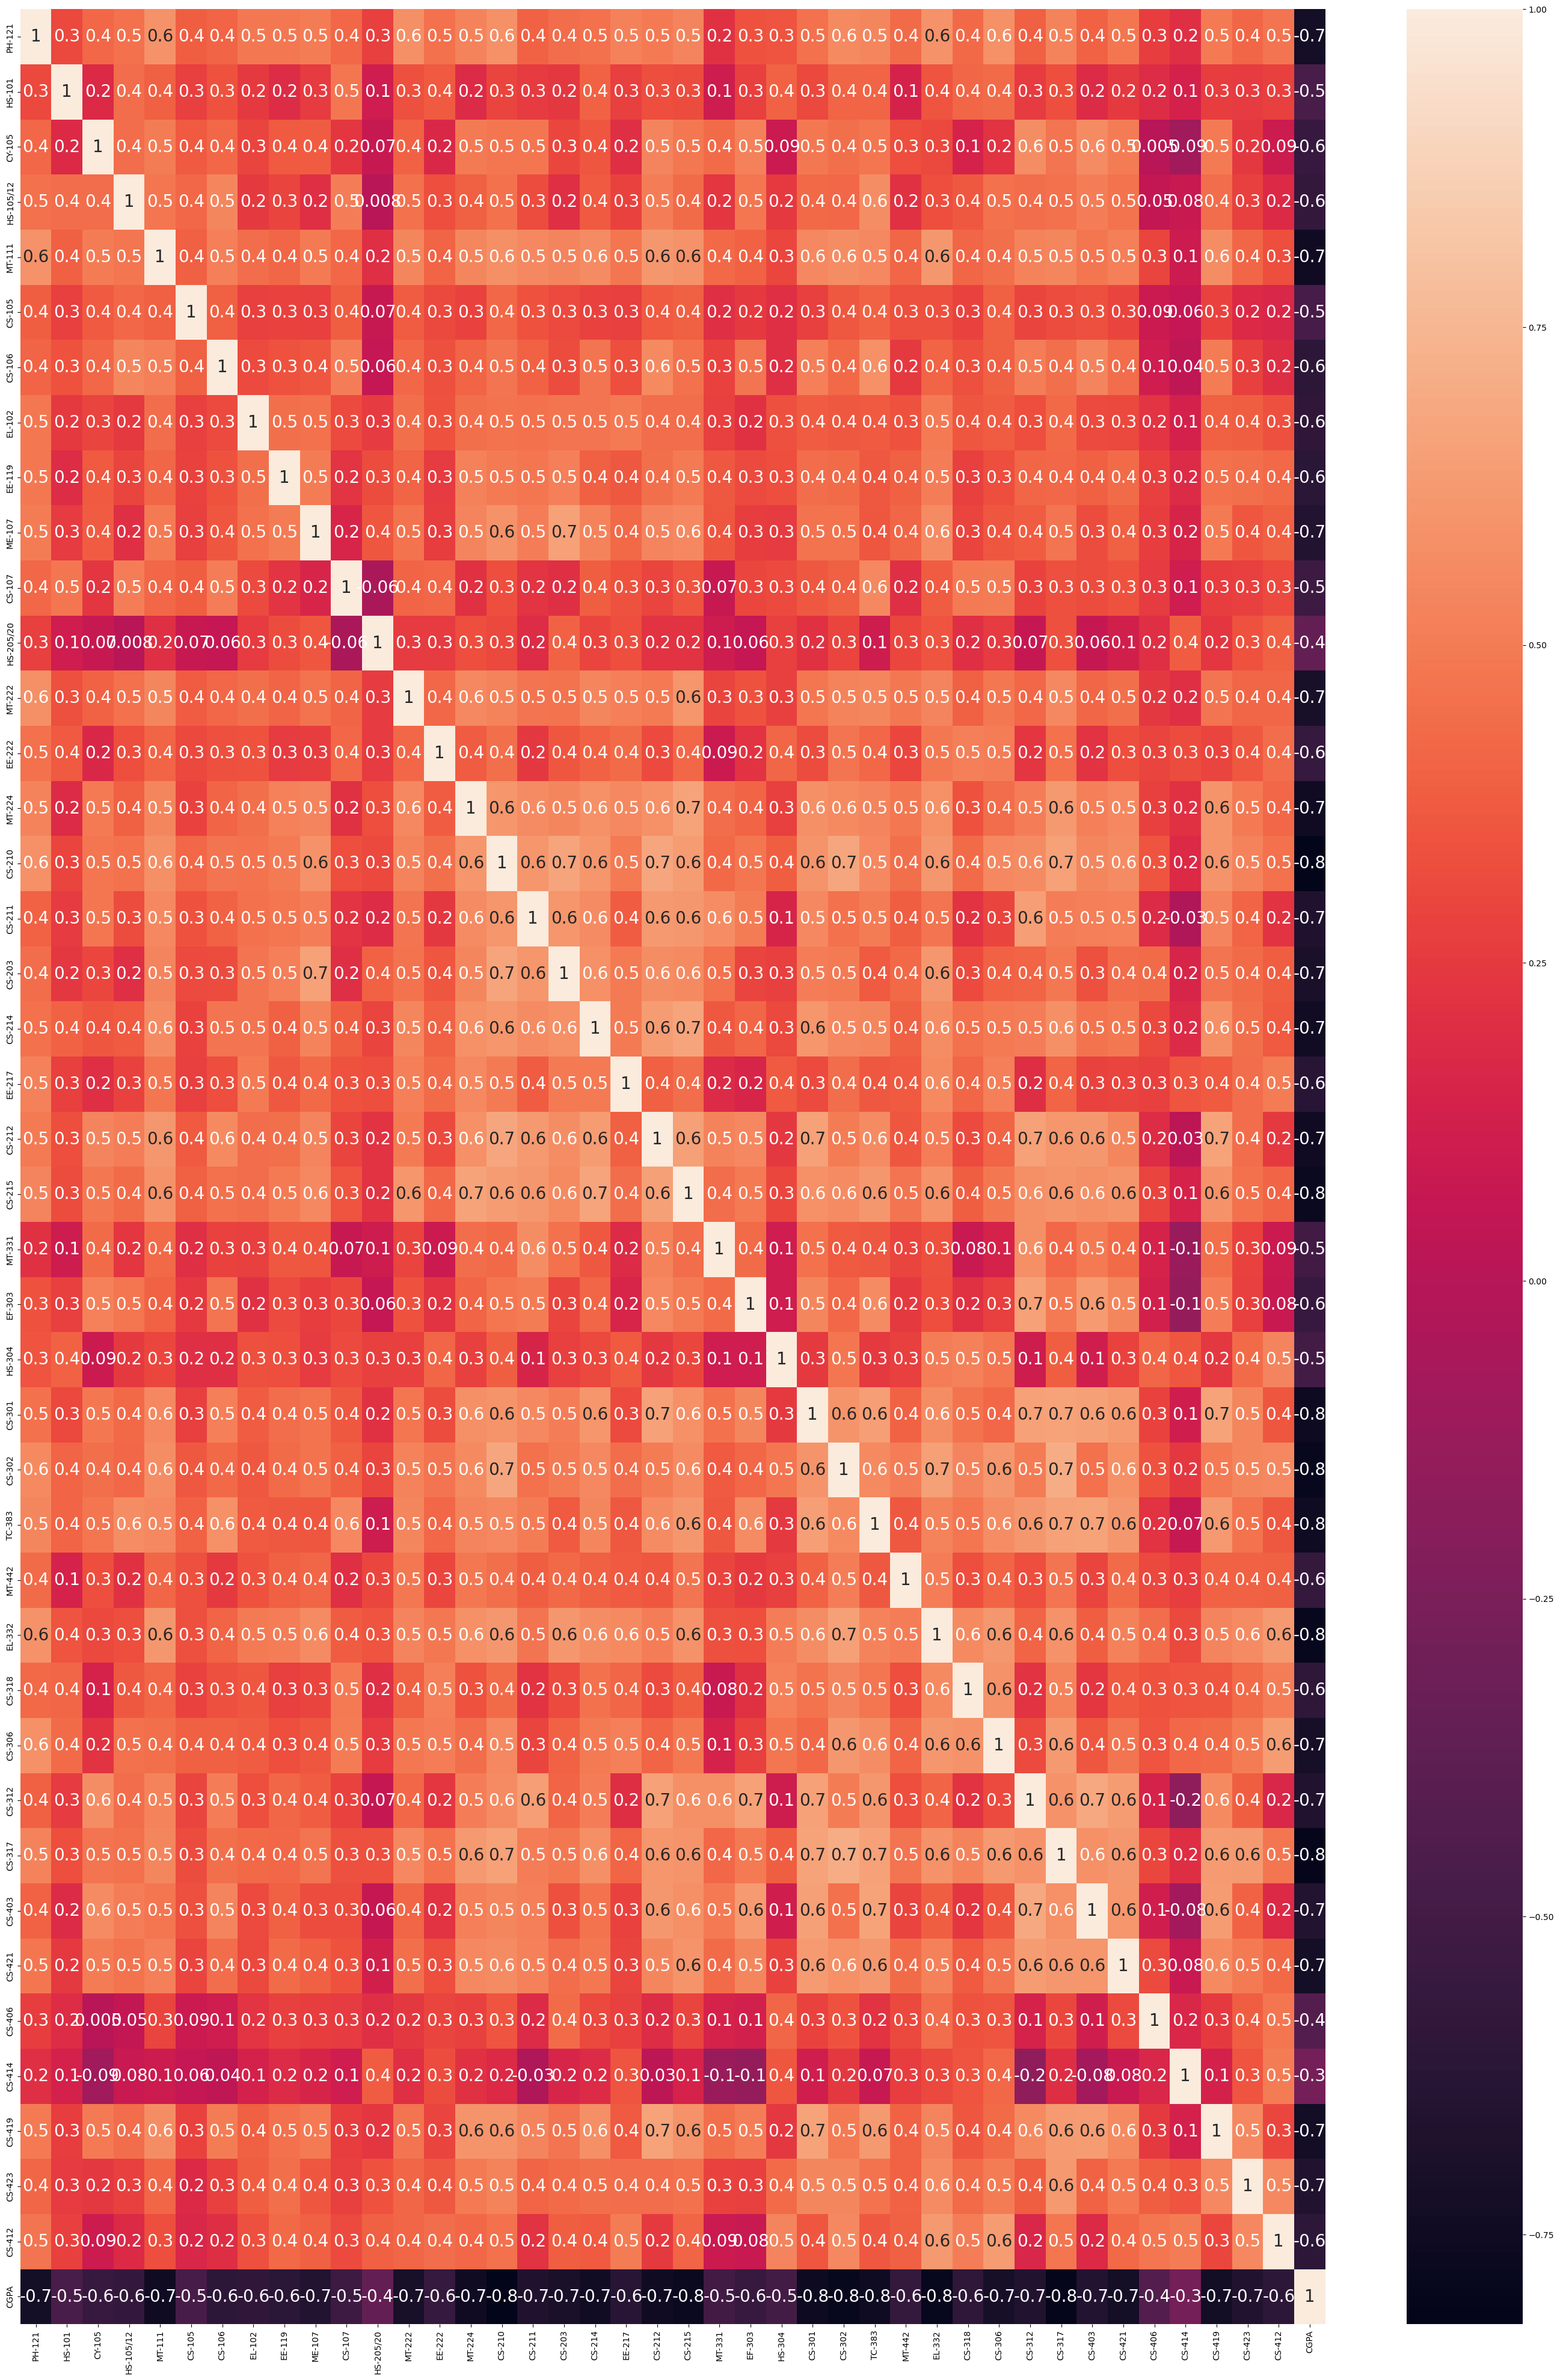

In [101]:
# Plotting heatmap
plt.figure(figsize =(35,50))
sns.heatmap(df.corr(), annot =True, fmt ='.1g', color ='b', annot_kws={'size': 20})
plt.show()

__No Multicollinearity found__

In [102]:
# Seperating Features and label
x =df.drop(columns =['CGPA'])
y =df[['CGPA']]

In [106]:
# Using standardscaler
scaler =StandardScaler()
x =pd.DataFrame(scaler.fit_transform(x), columns =x.columns)
x

PH-121    HS-101    CY-105  HS-105/12    MT-111    CS-105    CS-106  \
0   -1.088549  1.529549  1.640543   1.676071  0.396147  1.342846  1.672619   
1   -1.088549 -0.704017 -1.232618   0.398119  0.047031 -1.319480  0.293802   
2    2.618921  0.785027  1.640543   1.676071  1.792612  0.526474  2.017324   
3   -0.264667 -1.076278  0.447616   0.078631 -1.349434 -1.319480 -0.740310   
4   -1.088549  0.040505  0.690770   1.995559  1.094380  0.526474  0.983211   
..        ...       ...       ...        ...       ...       ...       ...   
381  0.147274 -0.704017 -1.232618   0.717607 -0.302085  1.006276 -0.395606   
382 -0.264667  1.529549 -1.232618   0.717607  0.047031  1.006276  0.638507   
383  0.147274 -1.820800 -1.232618  -0.560346 -1.000317 -1.319480 -0.740310   
384 -0.676608 -1.820800 -1.232618  -1.199322 -1.349434 -1.319480 -1.429719   
385  0.147274 -1.820800  0.447616   0.078631 -1.349434 -1.319480 -1.429719   

       EL-102    EE-119    ME-107  ...    CS-306    CS-312    CS-317  \
0   -1.377129  3.008302  1.574813  ...  1.996004  1.657897  1.639255   
1    0.063445 -0.550946 -0.736510  ... -0.679196 -0.590917 -0.577041   
2    1.504019  2.563396  0.914435  ...  1.613833  1.657897  0.531107   
3    0.063445 -1.440758 -0.736510  ... -0.679196  0.051601 -0.207658   
4   -0.296699  0.338866 -0.076132  ...  0.085147  0.372860  0.161725   
..        ...       ...       ...  ...       ...       ...       ...   
381  1.504019  0.338866 -0.076132  ...  0.467318 -0.912176 -0.577041   
382 -0.656842  0.783772  1.574813  ...  1.613833 -0.590917  0.900490   
383 -0.656842 -0.995852 -0.076132  ...  0.085147 -0.912176 -0.946424   
384 -0.656842 -1.440758 -1.396888  ... -0.679196 -0.269658 -0.207658   
385 -1.377129 -1.440758 -0.406321  ...  0.085147 -0.912176 -0.577041   

       CS-403    CS-421    CS-406    CS-414    CS-419    CS-423    CS-412  
0    0.880536  1.345179  0.163747  0.977680  1.082265  0.576798  0.087840  
1   -1.158785  0.197266 -1.920514 -1.527152 -1.561750 -0.966661 -1.324922  
2    2.240082  0.962541  0.908263  0.585505  1.522934  0.962663  1.971524  
3    0.200762 -0.185371  0.163747 -1.527152 -0.680411 -0.966661 -1.324922  
4    1.220422  0.579904  0.163747  0.318424  0.200927  0.190933  0.087840  
..        ...       ...       ...       ...       ...       ...       ...  
381  0.200762 -0.568008  0.705490  1.274976 -0.680411  2.120257  1.971524  
382  0.200762  1.727816  1.085510  1.402518 -0.239742  0.576798  1.029682  
383 -1.158785 -2.098558 -1.920514  0.798128  0.200927 -0.580796 -1.324922  
384 -1.158785 -2.098558  0.163747  0.585505 -0.680411  0.576798 -0.383081  
385 -1.158785 -0.568008 -1.920514  1.134630  0.200927 -0.966661 -0.383081  

[386 rows x 41 columns]

In [107]:
# Finding variance inflation factor in each scaled features
vif =pd.DataFrame()
vif['VIF Values'] =[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Features'] =x.columns
vif

VIF Values   Features
0     2.638186     PH-121
1     1.854865     HS-101
2     2.238095     CY-105
3     2.442609  HS-105/12
4     2.709445     MT-111
5     1.637566     CS-105
6     2.173109     CS-106
7     1.827657     EL-102
8     2.037471     EE-119
9     2.468927     ME-107
10    2.440290     CS-107
11    1.654145  HS-205/20
12    2.245605     MT-222
13    1.845054     EE-222
14    2.962081     MT-224
15    3.672738     CS-210
16    2.841145     CS-211
17    3.445361     CS-203
18    2.791725     CS-214
19    2.362145     EE-217
20    3.455071     CS-212
21    3.155199     CS-215
22    2.024403     MT-331
23    2.392543     EF-303
24    2.057318     HS-304
25    3.446400     CS-301
26    3.318637     CS-302
27    3.504973     TC-383
28    1.784565     MT-442
29    3.371638     EL-332
30    2.394563     CS-318
31    3.363355     CS-306
32    3.603228     CS-312
33    3.798959     CS-317
34    3.296449     CS-403
35    2.742217     CS-421
36    1.766148     CS-406
37    1.967629     CS-414
38    2.926782     CS-419
39    2.381333     CS-423
40    3.176116     CS-412

## EDA part completed, now we can build model

In [108]:
# Finding best random state
maxrs =0
maxacc =0

for i in range(1, 200):
    x_train, x_test, y_train, y_test =train_test_split(x, y, test_size =0.3, random_state =i)
    LR =LinearRegression()
    LR.fit(x_train, y_train)
    pred =LR.predict(x_test)
    acc =r2_score(y_test, pred)
    
    if acc > maxacc:
        maxacc =acc
        maxrs =i
        
print("Maximum Accuracy is :", acc*100, "at random state :", maxrs)

Maximum Accuracy is : 98.83683884532736 at random state : 164


In [109]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size =0.3, random_state =maxrs)

In [112]:
# Initializing models
LR =LinearRegression()
KNN =KNeighborsRegressor()
RFR =RandomForestRegressor()
GBR =GradientBoostingRegressor()
lasso =Lasso()
ridge =Ridge()
svr =SVR()
DTR =DecisionTreeRegressor()
ETR =ExtraTreesRegressor()

In [115]:
# Building models
models ={'LinearRegressor': LR,
        'KNeighborsRegressor': KNN,
        'RandomForestRegressor': RFR,
        'GradientBoostingRegressor': GBR,
        'Lasso': lasso,
        'Ridge': ridge,
        'SVR': svr,
        'DecisionTreeRegressor': DTR,
        'ExtraTreesRegressor': ETR}

for name, model in models.items():
    model.fit(x_train, y_train)
    test_pred =model.predict(x_test)
    train_pred =model.predict(x_train)
    
    print(name)
    print("*"*20)
    print("R2 Score on training data :", (r2_score(y_train, train_pred))*100)
    print("R2 Score on test data :", (r2_score(y_test, test_pred))*100)
    print("Mean Absolute Error: ", mean_absolute_error(y_test, test_pred))
    print("Mean Squared Error: ", mean_squared_error(y_test, test_pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_absolute_error(y_test, test_pred)))
    print('\n')
    
    print("Cross Validataion")
    print("*"*20)
    score =cross_val_score(model, x, y, cv =5)
    print(score)
    print(score.mean())
    print("Difference between R2 score and cross validation :", (r2_score(y_test, test_pred) -score.mean())*100)
    print("="*80)
    print('\n')

LinearRegressor
********************
R2 Score on training data : 98.82624161445035
R2 Score on test data : 99.03385786705763
Mean Absolute Error:  0.044216360272214476
Mean Squared Error:  0.0030485627459254203
Root Mean Squared Error:  0.21027686575611326


Cross Validataion
********************
[0.9789762  0.98919222 0.98494538 0.98797895 0.98085888]
0.9843903269237805
Difference between R2 score and cross validation : 0.5948251746795807


KNeighborsRegressor
********************
R2 Score on training data : 97.07060305142642
R2 Score on test data : 97.22722559751095
Mean Absolute Error:  0.07391379310344823
Mean Squared Error:  0.008749206206896547
Root Mean Squared Error:  0.2718709125733171


Cross Validataion
********************
[0.96768261 0.97913018 0.96579123 0.95998305 0.94073023]
0.9626634583446829
Difference between R2 score and cross validation : 0.9608797630426658


RandomForestRegressor
********************
R2 Score on training data : 99.02403753331805
R2 Score on test d

__Based on the model performance, we will choose Ridge as our model__

In [123]:
parameters ={'alpha': [10, 15, 20, 40, 50, 70, 100]}

In [117]:
GCV =GridSearchCV(Ridge(), parameters, cv =5)
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [10, 20, 40, 50, 70, 100]})

In [124]:
GCV.best_params_

{'alpha': 70}

In [121]:
Final_model =Ridge(alpha =15)
Final_model.fit(x_train, y_train)
pred =Final_model.predict(x_test)
acc =r2_score(y_test, pred)
print("Accuracy is :", acc*100)

Accuracy is : 99.04571993108613


__Model Accuracy improved from 99.03 to 99.04__

In [133]:
# Saving the model
pickle.dump(Final_model, open('Student_Grade.pkl', 'wb'))

In [134]:
# Loading model
loaded_model =pickle.load(open('Student_Grade.pkl', 'rb'))
pred =loaded_model.predict(x_test)
result =loaded_model.score(x_test, y_test)
print(result*100)
print(pred)

99.04571993108613
[[2.31663028]
 [1.86049791]
 [2.88157221]
 [2.46500065]
 [3.48829767]
 [2.41241012]
 [2.78570751]
 [3.9474199 ]
 [3.36408576]
 [3.11110033]
 [3.25651607]
 [2.25918311]
 [2.64128895]
 [3.55667791]
 [3.38459103]
 [3.67842339]
 [3.12527358]
 [2.82696423]
 [3.64499455]
 [3.22609762]
 [3.49951523]
 [3.64369406]
 [3.11593952]
 [3.32863163]
 [3.29677022]
 [2.0691085 ]
 [3.98052915]
 [2.83397743]
 [3.50844673]
 [3.79787247]
 [2.76118308]
 [3.71757647]
 [2.70567496]
 [3.20042377]
 [3.14223479]
 [3.89049872]
 [3.45192853]
 [2.83269275]
 [3.749626  ]
 [3.04743319]
 [2.57150891]
 [2.4398744 ]
 [2.51200372]
 [2.62719641]
 [3.45781449]
 [3.44949175]
 [3.17593858]
 [3.07563024]
 [2.5567546 ]
 [3.78229384]
 [2.60922198]
 [3.75494778]
 [3.23584052]
 [3.45684974]
 [3.20442462]
 [3.35621161]
 [2.98363127]
 [1.81798476]
 [2.00172136]
 [3.11586495]
 [3.3203107 ]
 [2.42559935]
 [2.26952179]
 [3.54505711]
 [2.7880646 ]
 [3.31257247]
 [2.96590259]
 [2.76937318]
 [3.02413039]
 [3.79416535]
 [

In [135]:
# Comparing predicted vs actual
test =np.array(y_test)
df =pd.DataFrame()
df['Actual'] =test
df['Predicted'] =pred
df

ValueError: Cannot set a frame with no defined index and a value that cannot be converted to a Series